In [1]:
import gym
import linearstochlearnerdynamics
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def getOptWeights(m, rewards, pos_weights, alpha):
    #maxsofar = -1 * sys.maxsize
    policyvals = dict()
    
    for i, j, k in pos_weights:
        
        a = np.array([
            [alpha*m[0][i][0]-1, alpha*m[0][j][1], alpha*m[0][k][2]],
            [alpha*m[1][i][0], alpha*m[1][j][1]-1, alpha*m[1][k][2]],
            [alpha*m[2][i][0], alpha*m[2][j][1], alpha*m[2][k][2]-1]
        ])
        
        b = np.array([
            -(m[0][i][0]*rewards[0][0]+m[0][i][1]*rewards[0][1]+m[0][i][2]*rewards[0][2]),
            -(m[1][j][0]*rewards[1][0]+m[1][j][1]*rewards[1][1]+m[1][j][2]*rewards[1][2]),
            -(m[2][k][0]*rewards[2][0]+m[2][k][1]*rewards[2][1]+m[2][k][2]*rewards[2][2])
        ])
        
        v = np.linalg.solve(a, b)
        #print(i, j, k, v, sum(v))
        #if v[0] + v[1] + v[2] > maxsofar:
        #    bestpolicyweight = (i, j, k, w)
        #    maxsofar = v[0] + v[1] + v[2]
        policyvals[(i,j,k)] = v
            
    return policyvals

def getStatProb(policy, trans_matrix):
    a = np.array([
        [trans_matrix[0][policy[0]][0]-1, trans_matrix[1][policy[1]][0], trans_matrix[2][policy[2]][0]],
        [trans_matrix[0][policy[0]][1], trans_matrix[1][policy[1]][1]-1, trans_matrix[2][policy[2]][1]],
        [1,1,1]
    ])
    b = np.array([0, 0, 1])
    return np.linalg.solve(a, b)

### Toy Problem 3: TD Learner
Under the optimal policy, this should converge to $w_1^* =5.14404, w_2^*=5.17404$, attaining a min value of 3.78382.  This new policy chooses action $a_1$ in states A and B, and action $a_2$ in state C.

[2017-12-04 02:55:52,772] Making new env: ToyProblem3-Random-v0


[-0.67999203  0.05020727]


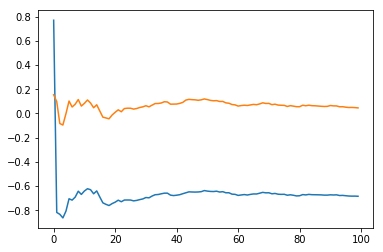

[-0.64111279  0.06577173]
0.146784045279


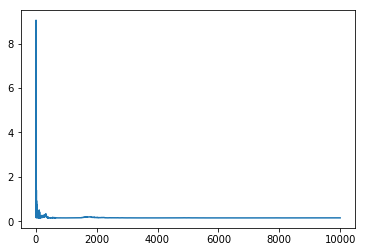

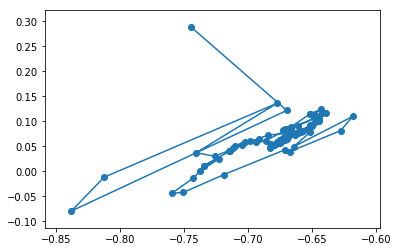

In [3]:
lst=[]
minobjective = []
feat0 = np.array([[ 0.43898943,  0.22082609],
                  [ 0.7477987 ,  1.87833361],
                  [ 0.92146322,  0.11201997]])
a = 0.80335372878595401

b0=linearstochlearnerdynamics.linearStochLearner(feat0, 'TD', 'ToyProblem3-Random-v0', alpha = a, w_start=-10)
b0.w = np.array([ 0.76978262,  0.15420051])
b0.env.unwrapped.rewards = np.array([[-0.21968265, -0.75967124, -0.99310528],
                                     [ 0.31682402,  0.62587112, -0.25533644],
                                     [-0.4306954 ,  0.06054098, -0.56165234]])
b0.env.unwrapped.trans_matrix = np.array([[[ 0.24566535,  0.35371086,  0.40062379],
                                           [ 0.40312035,  0.16686609,  0.43001355]],

                                          [[ 0.69856505,  0.01768614,  0.2837488 ],
                                           [ 0.17263182,  0.30017577,  0.52719241]],

                                          [[ 0.21160375,  0.38369088,  0.40470537],
                                           [ 0.02628361,  0.68964618,  0.28407021]]])
policy = (b0.getAction(0), b0.getAction(1), b0.getAction(2))
print(b0.policyIterate(num_iter=1, num_ep=100))
plt.plot(b0.weights[::100])
plt.show()

statdist = getStatProb(policy, b0.env.unwrapped.trans_matrix)
optval = getOptWeights(b0.env.unwrapped.trans_matrix, b0.env.unwrapped.rewards, [policy], a)[policy]
for w in b0.weights:
    s = 0
    for i in range(3):
        s += statdist[i] * (sum(feat0[i]*w) - optval[i]) ** 2
    minobjective.append(s)
print(b0.weights[minobjective.index(min(minobjective))])
print(min(minobjective))
plt.plot(minobjective)
plt.show()

# Show progression in 2D
x = []
y = []
for i in b0.weights:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x[50::100], y[50::100])
plt.plot(x[50::100], y[50::100])
plt.show()

### Toy Problem 3: STD Learner (2017)

[2017-12-04 02:56:02,074] Making new env: ToyProblem3-Random-v0


[ 1.0025759   0.24457865]


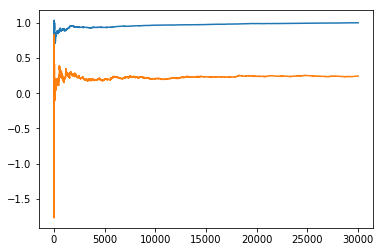

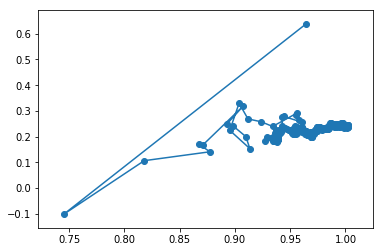

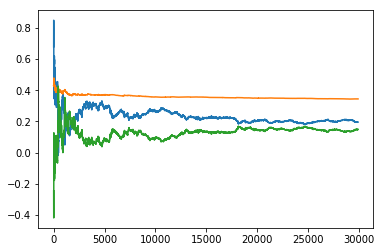

In [4]:
feat0 = np.array([[ 0.43898943,  0.22082609],
                  [ 0.7477987 ,  1.87833361],
                  [ 0.92146322,  0.11201997]])
a = 0.80335372878595401

b0=linearstochlearnerdynamics.linearStochLearner(feat0, 'STD-NEW', 'ToyProblem3-Random-v0', alpha = a, w_start=-10)
b0.w = np.array([ 0.76978262,  0.15420051])
b0.env.unwrapped.rewards = np.array([[-0.21968265, -0.75967124, -0.99310528],
                                     [ 0.31682402,  0.62587112, -0.25533644],
                                     [-0.4306954 ,  0.06054098, -0.56165234]])
b0.env.unwrapped.trans_matrix = np.array([[[ 0.24566535,  0.35371086,  0.40062379],
                                           [ 0.40312035,  0.16686609,  0.43001355]],

                                          [[ 0.69856505,  0.01768614,  0.2837488 ],
                                           [ 0.17263182,  0.30017577,  0.52719241]],

                                          [[ 0.21160375,  0.38369088,  0.40470537],
                                           [ 0.02628361,  0.68964618,  0.28407021]]])
policy = (b0.getAction(0),b0.getAction(1),b0.getAction(2))
print(b0.policyIterate(num_iter=1, num_ep=300))
plt.plot(b0.weights)
plt.show()

# Show progression in 2D
x = []
y = []
for i in b0.weights:
    x.append(i[0])
    y.append(i[1])
plt.scatter(x[5::100], y[5::100])
plt.plot(x[5::100], y[5::100])
plt.show()

## Plot loss
all_weights = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            all_weights.append((i,j,k))

policyvals = getOptWeights(b0.env.unwrapped.trans_matrix, b0.env.unwrapped.rewards, all_weights, a)
stdAB = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([1,-1,0]))
stdAC = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([1,0,-1]))
stdBC = (b0.weights@np.transpose(feat0)-policyvals[tuple(policy)])@np.transpose(np.array([0,1,-1]))
plt.plot(stdAB[100:])
plt.plot(stdAC[100:])
plt.plot(stdBC[100:])
plt.show()

In [5]:
print(b0.getAction(0),b0.getAction(1),b0.getAction(2))

0 1 1


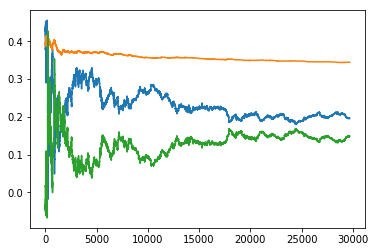

In [6]:
plt.plot(stdAB[300:])
plt.plot(stdAC[300:])
plt.plot(stdBC[300:])
plt.show()

In [7]:
stdAB[-1], stdAC[-1], stdBC[-1]

(0.19541004743312707, 0.34451335867537769, 0.14910331124225062)

In [8]:
policy

(1, 1, 1)

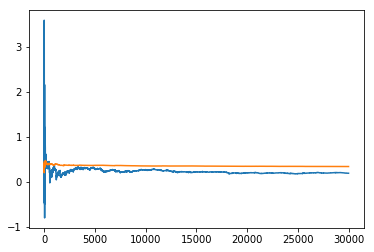

In [9]:
plt.plot(stdAB)
plt.plot(stdAC)
plt.show()